In [19]:
pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 21.8 MB/s eta 0:00:00


In [2]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 57.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 73.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 15.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0;

In [7]:
import pandas as pd
import gensim
from gensim import corpora
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
import re
"Done"

'Done'

In [14]:
# Unduh data NLTK
import nltk
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("punkt_tab")
"Done"

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


'Done'

In [10]:
# === STEP 1: Load data ===
df = pd.read_csv("/content/hasil_preprocessing.csv")
df

,title,href,body,source,clean
0,LPPOM MUI | Bogor - Facebook,https://www.facebook.com/halalindonesia/,"LPPOM MUI, Bogor, Indonesia. 145,648 likes · 4...",facebook.com,lppom mui bogor facebook lppom mui bogor indon...
1,LPH Halal Nusantara - Facebook,https://www.facebook.com/halalnusantara.id/,"pentingnya sertifikasi halal, tidak hanya dari...",facebook.com,lph halal nusantara facebook sertifikasi halal...
2,Info Sertifikasi Halal Indonesia - Facebook,https://www.facebook.com/groups/1127431861260327/,Group ini adalah media silaturahmi antar Pelak...,facebook.com,info sertifikasi halal indonesia facebook grou...
3,Halal Corridor | Jakarta - Facebook,https://www.facebook.com/profile.php/?id=61565...,"Jun 1, 2025· 󰟠 Seru-seruan bareng Halal Corrid...",facebook.com,halal corridor jakarta facebook jun 1 2025 ser...
4,PERESMIAN ESQ HALAL CENTER ESQ mendukung progr...,https://www.facebook.com/AryGinanjarAgustian/v...,ESQ mendukung program Halal Indonesia. Selain ...,facebook.com,peresmian esq halal center esq mendukung progr...
...,...,...,...,...,...
526,Kumpulan artikel terkait Lisensi Halal - SINDO...,https://kalam.sindonews.com/topic/28844/lisens...,ESQ Halal Center secara resmi mengumumkan keik...,sindonews.com,kumpulan artikel terkait lisensi halal sindone...
527,29 Jurusan Kuliah S2 UI Terakreditasi Unggul B...,https://edukasi.sindonews.com/read/1238691/211...,Banyak jurusan kuliah S2 di UI yang terakredit...,sindonews.com,29 jurusan kuliah s2 ui terakreditasi unggul b...
528,"Perjalanan Baker's Gram, dari Dapur Keluarga k...",https://ekbis.sindonews.com/read/1581953/34/pe...,JAKARTA - Perjalanan usaha Baker's Gram berawa...,sindonews.com,perjalanan baker s gram dapur keluarga panggun...
529,Indomie Berhasil Dinobatkan sebagai Global Hal...,https://ekbis.sindonews.com/read/1483449/34/in...,Indomie dinobatkan sebagai Global Halal Brand ...,sindonews.com,indomie berhasil dinobatkan global halal brand...


In [12]:
# Pastikan kolom 'clean' ada
if "clean" not in df.columns:
    raise ValueError("Kolom 'clean' tidak ditemukan di file.")

In [15]:
# === STEP 2: Preprocessing ===
stop_words = set(stopwords.words("indonesian"))

def preprocess(text):
    text = re.sub(r'\d+', '', text.lower())  # hapus angka
    tokens = word_tokenize(text)
    return [w for w in tokens if w.isalpha() and w not in stop_words]

tokenized_texts = df["clean"].astype(str).apply(preprocess).tolist()


In [16]:
# === STEP 3: Buat dictionary dan corpus ===
dictionary = corpora.Dictionary(tokenized_texts)
corpus = [dictionary.doc2bow(text) for text in tokenized_texts]

In [17]:
# === STEP 4: Buat LDA model ===
NUM_TOPICS = 8  # Jumlah topik yang diinginkan
lda_model = gensim.models.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=NUM_TOPICS,
    random_state=42,
    passes=10,
    per_word_topics=True
)

In [18]:
# === STEP 5: Tampilkan topik ===
print("\n📌 Topik yang Ditemukan:")
for idx, topic in lda_model.print_topics(num_words=5):
    print(f"Topik {idx + 1}: {topic}")



📌 Topik yang Ditemukan:
Topik 1: 0.051*"halal" + 0.022*"sertifikasi" + 0.017*"indonesia" + 0.010*"international" + 0.009*"bihalal"
Topik 2: 0.057*"halal" + 0.024*"sertifikasi" + 0.013*"makanan" + 0.010*"islam" + 0.010*"umkm"
Topik 3: 0.043*"halal" + 0.018*"indonesia" + 0.016*"sertifikasi" + 0.010*"bihalal" + 0.008*"industri"
Topik 4: 0.047*"halal" + 0.035*"ayam" + 0.033*"goreng" + 0.027*"widuran" + 0.016*"non"
Topik 5: 0.034*"solo" + 0.029*"ayam" + 0.028*"goreng" + 0.026*"widuran" + 0.021*"makan"
Topik 6: 0.025*"halal" + 0.022*"makanan" + 0.013*"sertifikasi" + 0.013*"al" + 0.010*"qur"
Topik 7: 0.115*"halal" + 0.040*"sertifikasi" + 0.027*"produk" + 0.014*"indonesia" + 0.013*"makanan"
Topik 8: 0.047*"halal" + 0.021*"sertifikasi" + 0.021*"bsi" + 0.019*"indonesia" + 0.015*"expo"


In [20]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# === Hubungkan LDA ke pyLDAvis ===
pyldavis_data = gensimvis.prepare(lda_model, corpus, dictionary)

# === Tampilkan di notebook / Jupyter ===
pyLDAvis.display(pyldavis_data)


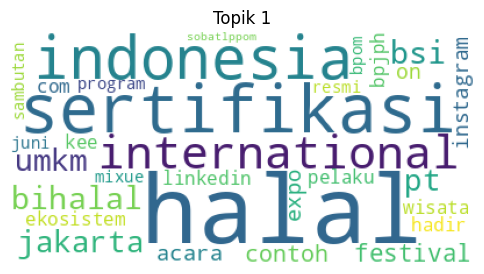

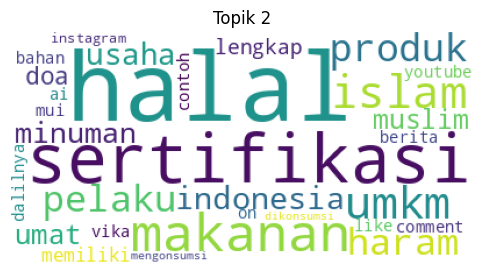

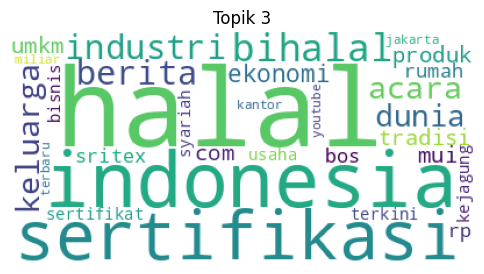

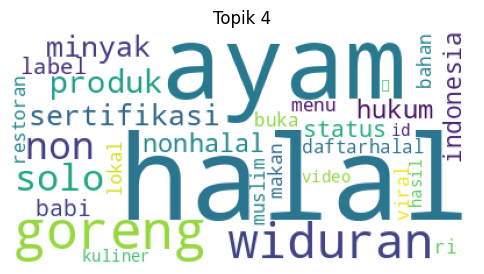

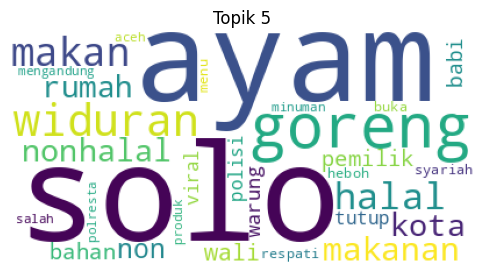

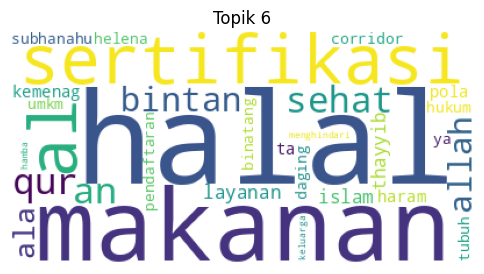

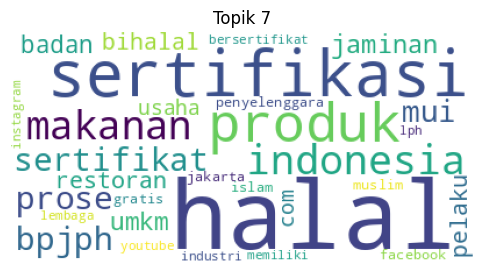

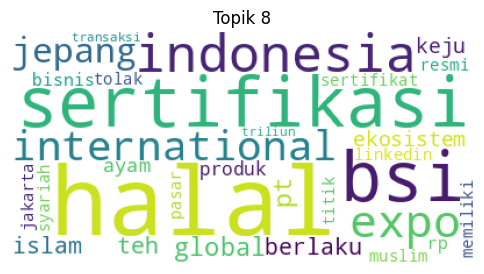

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for i in range(NUM_TOPICS):
    plt.figure(figsize=(6, 4))
    plt.imshow(WordCloud(background_color='white').fit_words(dict(lda_model.show_topic(i, 30))))
    plt.axis("off")
    plt.title(f"Topik {i+1}")
    plt.show()

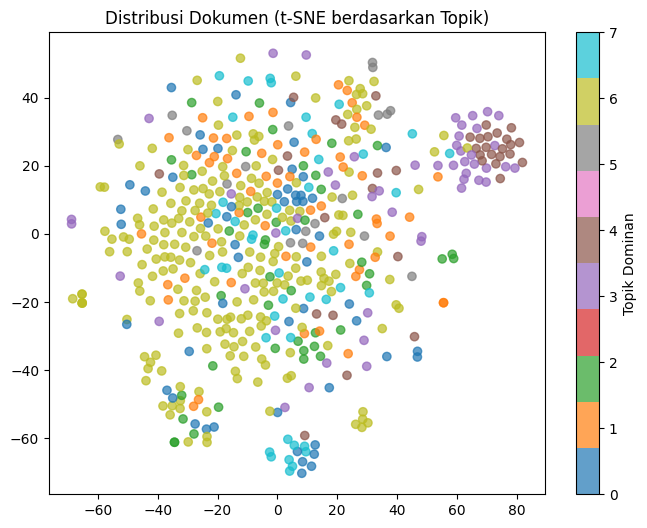

In [22]:
from sklearn.manifold import TSNE
import numpy as np

topic_values = [lda_model.get_document_topics(doc) for doc in corpus]
dominant_topic = [max(topic, key=lambda x: x[1])[0] for topic in topic_values]
topic_distributions = gensim.matutils.corpus2dense(corpus=corpus, num_terms=len(dictionary)).T

tsne = TSNE(n_components=2, random_state=0)
tsne_coords = tsne.fit_transform(topic_distributions)

plt.figure(figsize=(8, 6))
plt.scatter(tsne_coords[:, 0], tsne_coords[:, 1], c=dominant_topic, cmap='tab10', alpha=0.7)
plt.colorbar(label='Topik Dominan')
plt.title("Distribusi Dokumen (t-SNE berdasarkan Topik)")
plt.show()


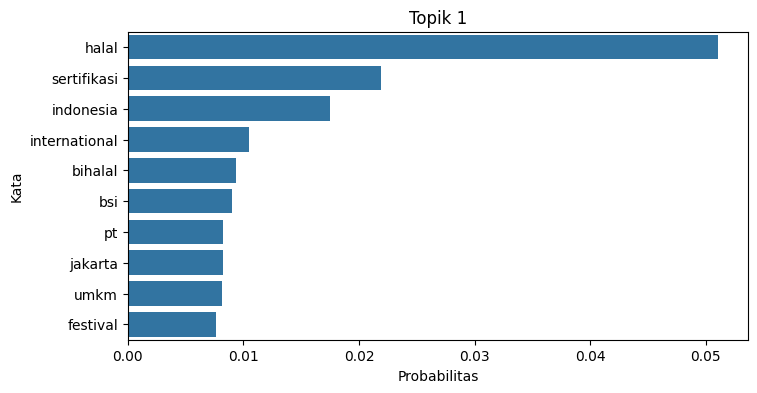

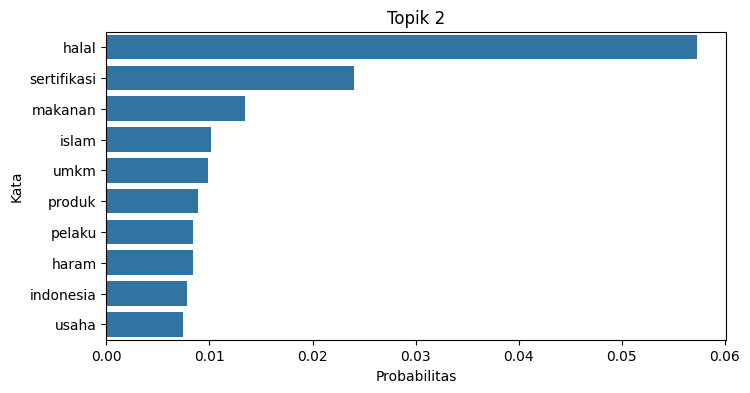

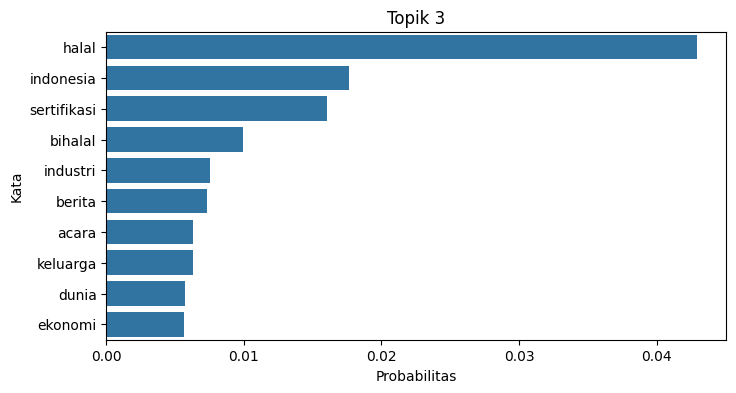

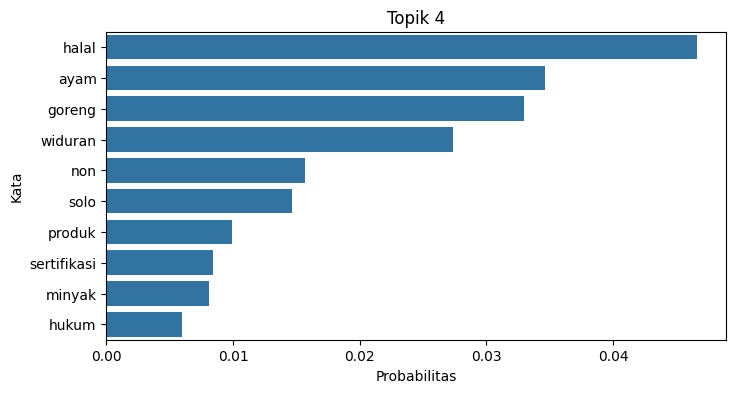

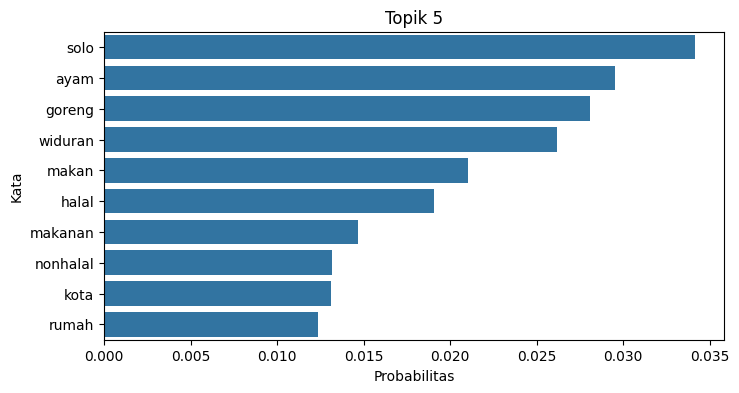

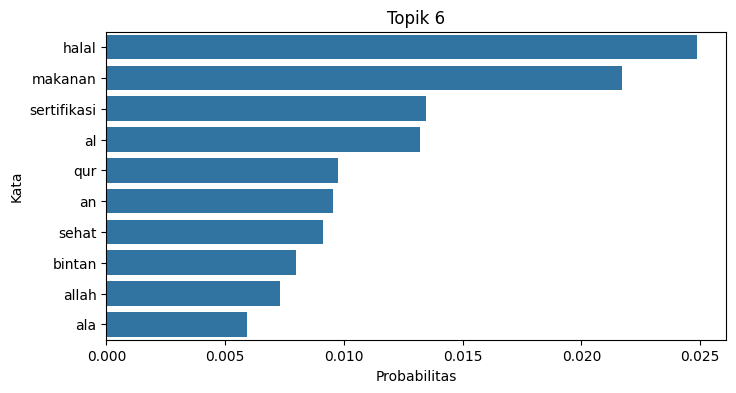

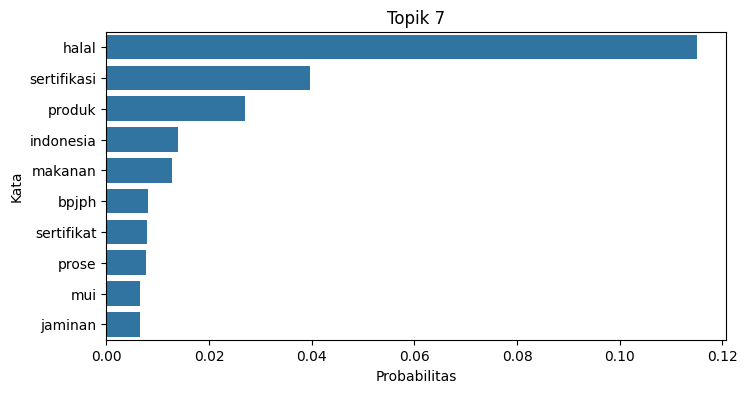

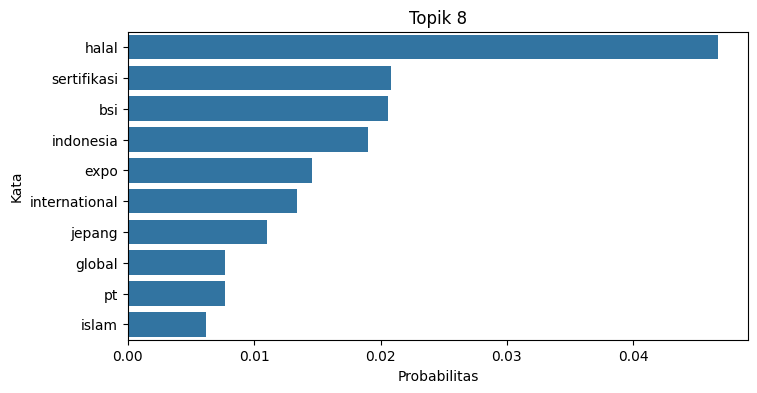

In [23]:
import seaborn as sns

for i in range(NUM_TOPICS):
    top_words = dict(lda_model.show_topic(i, 10))
    plt.figure(figsize=(8, 4))
    sns.barplot(x=list(top_words.values()), y=list(top_words.keys()))
    plt.title(f"Topik {i+1}")
    plt.xlabel("Probabilitas")
    plt.ylabel("Kata")
    plt.show()
